In [1]:
from __future__ import print_function
import ROOT
from ROOT import TChain
from larcv import larcv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.19/01


/home/dell/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


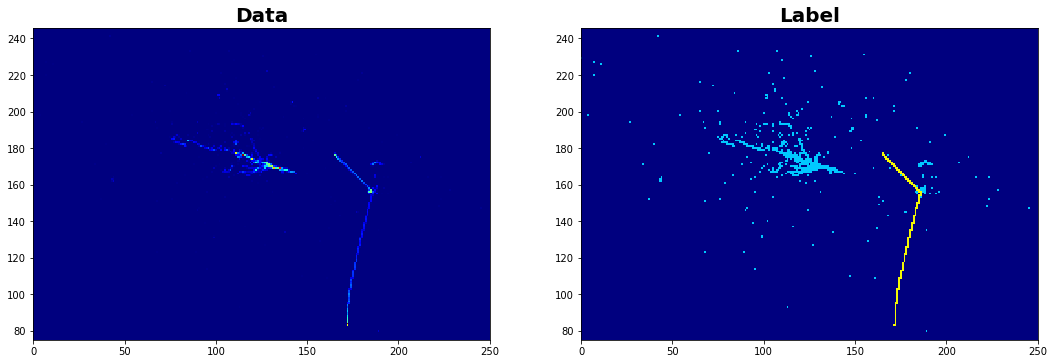

In [2]:
from larcv import larcv

# A utility function to compute the 2D (X,Y) range to zoom-in so that it avoids showing zero region of an image.
def get_view_range(image2d):
    nz_pixels=np.where(image2d>0.0)
    ylim = (np.min(nz_pixels[0])-5,np.max(nz_pixels[0])+5)
    xlim = (np.min(nz_pixels[1])-5,np.max(nz_pixels[1])+5)
    # Adjust for allowed image range
    ylim = (np.max((ylim[0],0)), np.min((ylim[1],image2d.shape[1]-1)))
    xlim = (np.max((xlim[0],0)), np.min((xlim[1],image2d.shape[0]-1)))
    return (xlim,ylim)

def show_event(entry=-1):
    # Create TChain for data image
    chain_image2d = ROOT.TChain('image2d_data_tree')
    chain_image2d.AddFile('C2/test_10k.root')
    # Create TChain for label image
    chain_label2d = ROOT.TChain('image2d_segment_tree')
    chain_label2d.AddFile('C2/test_10k.root')
    
    if entry < 0:
        entry = np.random.randint(0,chain_label2d.GetEntries())

    chain_label2d.GetEntry(entry)
    chain_image2d.GetEntry(entry)

    # Let's grab a specific projection (1st one)
    image2d = larcv.as_ndarray(chain_image2d.image2d_data_branch.as_vector().front())
    label2d = larcv.as_ndarray(chain_label2d.image2d_segment_branch.as_vector().front())

    # Get image range to focus
    xlim, ylim = get_view_range(image2d)
    
    # Dump images
    fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(18,12), facecolor='w')
    ax0.imshow(image2d, interpolation='none', cmap='jet', origin='lower')
    ax1.imshow(label2d, interpolation='none', cmap='jet', origin='lower',vmin=0., vmax=3.1)
    ax0.set_title('Data',fontsize=20,fontname='Georgia',fontweight='bold')
    ax0.set_xlim(xlim)
    ax0.set_ylim(ylim)
    ax1.set_title('Label',fontsize=20,fontname='Georgia',fontweight='bold')
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    plt.show()
    
    return (np.array(image2d), np.array(label2d))

# Let's look at one specific event entry
ENTRY = 2
image2d, label2d = show_event(ENTRY)

In [3]:
unique_values, unique_counts = np.unique(label2d, return_counts=True)
print('Label values:',unique_values)
print('Label counts:',unique_counts)

Label values: [0. 1. 2.]
Label counts: [64886   520   130]


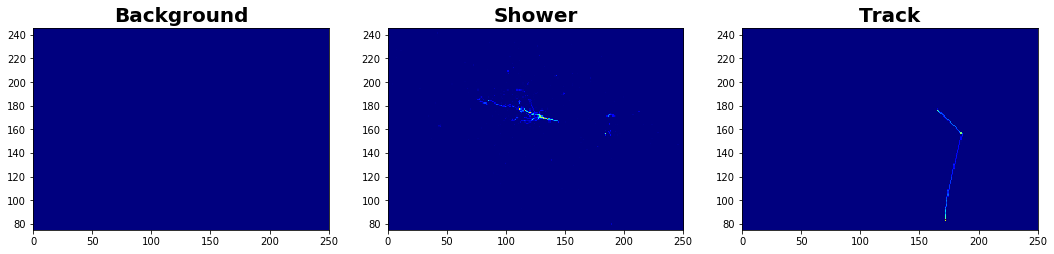

In [4]:
categories = ['Background','Shower','Track']

fig, axes = plt.subplots(1, len(unique_values), figsize=(18,12), facecolor='w')
xlim,ylim = get_view_range(image2d)
for index, value in enumerate(unique_values):
    ax = axes[index]
    mask = (label2d == value)
    ax.imshow(image2d * mask, interpolation='none', cmap='jet', origin='lower')
    ax.set_title(categories[index],fontsize=20,fontname='Georgia',fontweight='bold')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.show()

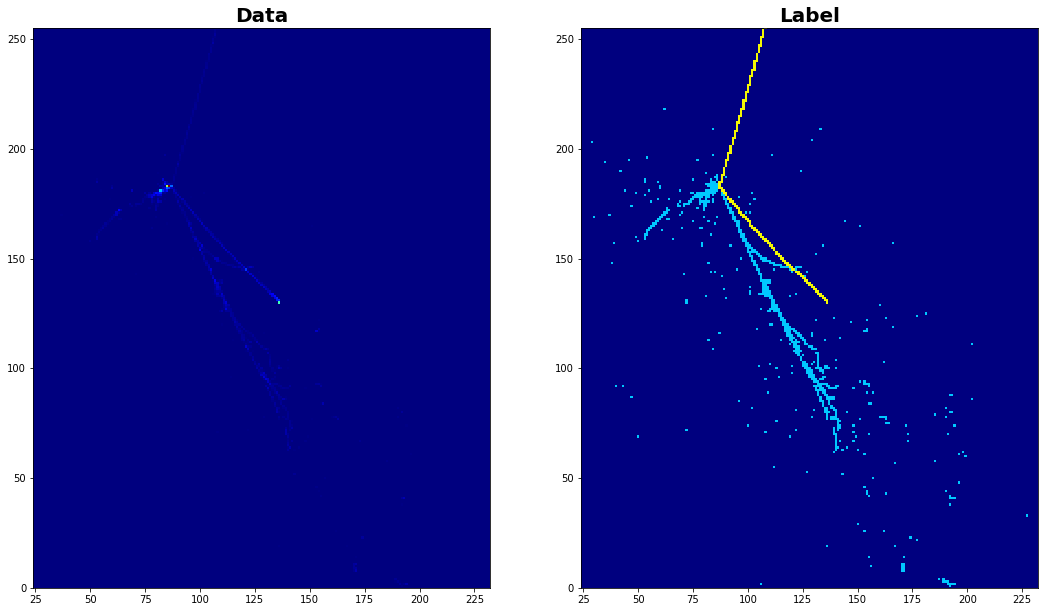

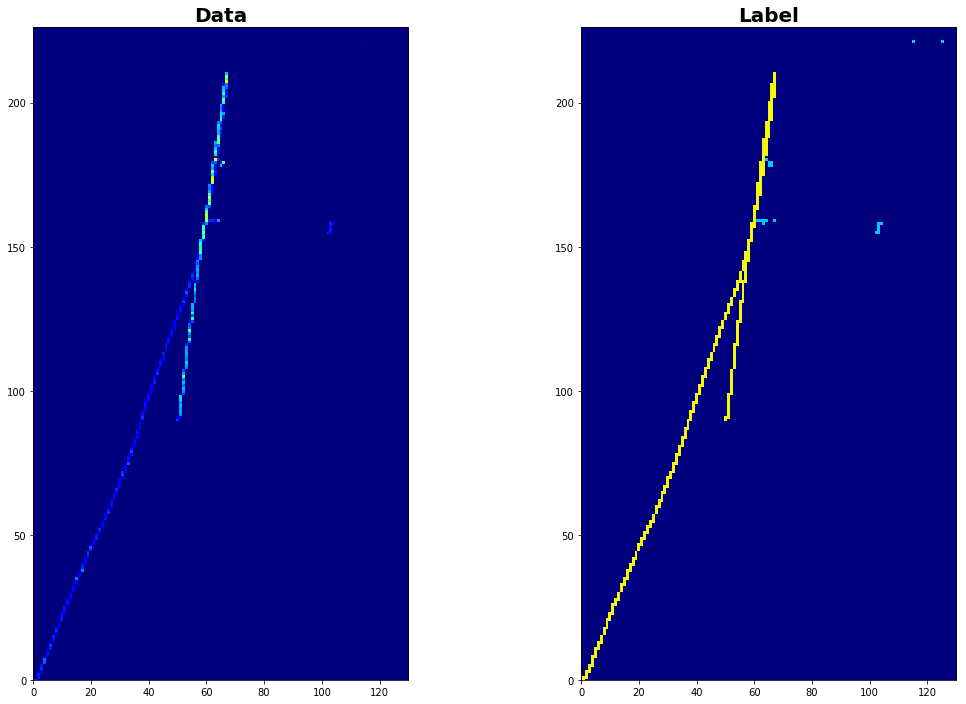

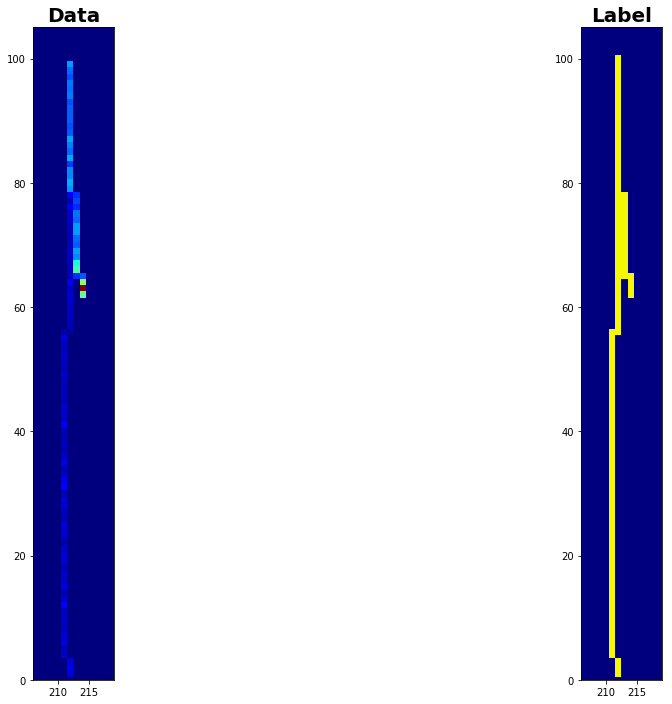

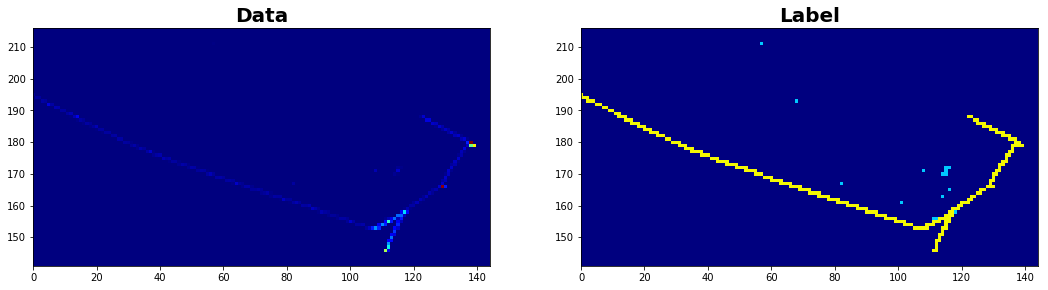

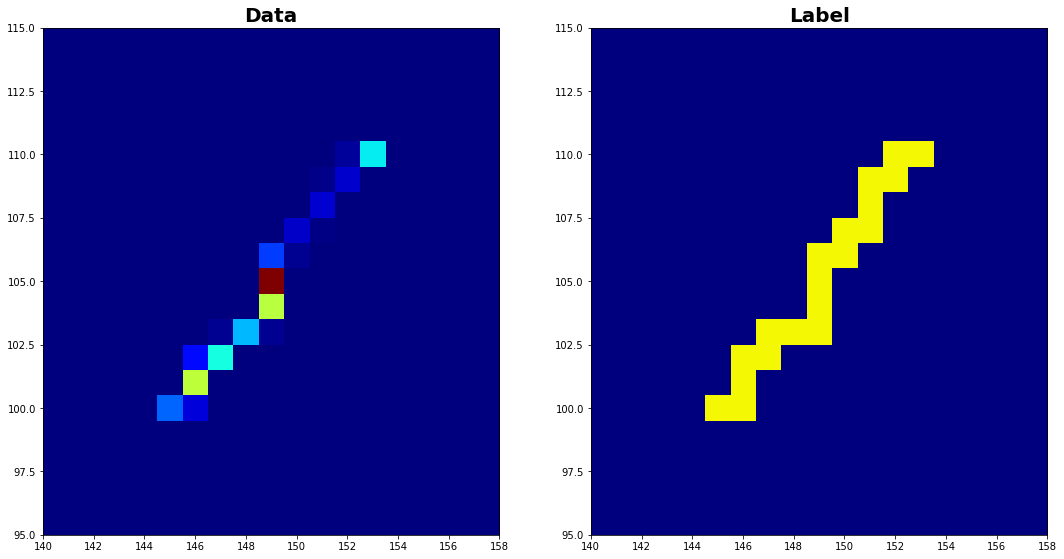

In [5]:
for _ in range(5): show_event()

In [6]:
ROOT.TFile.Open('C2/test_10k.root').ls()

TFile**		C2/test_10k.root	
 TFile*		C2/test_10k.root	
  KEY: TTree	cluster2d_mcst_tree;7	mcst tree
  KEY: TTree	cluster2d_mcst_tree;6	mcst tree
  KEY: TTree	image2d_data_tree;5	data tree
  KEY: TTree	image2d_data_tree;4	data tree
  KEY: TTree	image2d_segment_tree;3	segment tree
  KEY: TTree	image2d_segment_tree;2	segment tree
  KEY: TTree	particle_mcst_tree;1	mcst tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [8]:
# Let's look at the same event we saw in the previous section
ENTRY=2

particle_mctruth_chain = TChain("particle_mctruth_tree")
particle_mctruth_chain.AddFile("C2/test_10k.root")
particle_mctruth_chain.GetEntry(ENTRY)
cpp_object = particle_mctruth_chain.particle_mctruth_branch

print('particle_mctruth_tree contents:')
for particle in cpp_object.as_vector():
    print(particle.dump())

particle_mctruth_tree contents:
      Particle  (PdgCode,TrackID) = (2212,0) ... with Parent (2212,0)
      Vertex   (x, y, z, t) = (93.2396,78.1886,4.708,4105.05)
      Momentum (px, py, pz) = (-158.058,-575.546,515.5)
      Inittial Energy  = 1.2257
      Deposit  Energy  = 0
      Creation Process = primary
      BBox3D:     (0,0,0) => (0,0,0)

      Particle  (PdgCode,TrackID) = (2212,0) ... with Parent (2212,0)
      Vertex   (x, y, z, t) = (93.2396,78.1886,4.708,4105.05)
      Momentum (px, py, pz) = (-372.575,369.75,-173.048)
      Inittial Energy  = 1.08896
      Deposit  Energy  = 0
      Creation Process = primary
      BBox3D:     (0,0,0) => (0,0,0)

      Particle  (PdgCode,TrackID) = (22,0) ... with Parent (22,0)
      Vertex   (x, y, z, t) = (93.2396,78.1886,4.708,4105.05)
      Momentum (px, py, pz) = (-3.23032,-0.268878,91.3756)
      Inittial Energy  = 0.091433
      Deposit  Energy  = 0
      Creation Process = primary
      BBox3D:     (0,0,0) => (0,0,0)

      Parti

In [10]:
particle_mcst_chain = TChain("particle_mcst_tree")
particle_mcst_chain.AddFile("C2/test_10k.root")
particle_mcst_chain.GetEntry(ENTRY)
cpp_object = particle_mcst_chain.particle_mcst_branch

print('particle_mcst_tree contents:')
for particle in cpp_object.as_vector():
    print(particle.dump())

particle_mcst_tree contents:
      Particle  (PdgCode,TrackID) = (2212,1) ... with Parent (2212,1)
      Vertex   (x, y, z, t) = (95.998,76.3177,4.65729,4105.05)
      Momentum (px, py, pz) = (-158.058,-575.546,515.5)
      Inittial Energy  = 1225.7
      Deposit  Energy  = 285.023
      Creation Process = primary
      BBox3D:     (85.75,41.75,4.75) => (93.25,78.25,35.25)
          Plane 0 BBox2D:     (85.75,41.75) => (93.25,78.25)
          Plane 1 BBox2D:     (41.75,4.75) => (78.25,35.25)
          Plane 2 BBox2D:     (4.75,85.75) => (35.25,93.25)

      Particle  (PdgCode,TrackID) = (2212,2) ... with Parent (2212,2)
      Vertex   (x, y, z, t) = (95.998,76.3177,4.65729,4105.05)
      Momentum (px, py, pz) = (-372.575,369.75,-173.048)
      Inittial Energy  = 1088.96
      Deposit  Energy  = 128.727
      Creation Process = primary
      BBox3D:     (82.75,78.25,0.25) => (93.25,88.75,4.75)
          Plane 0 BBox2D:     (82.75,78.25) => (93.25,88.75)
          Plane 1 BBox2D:     (78

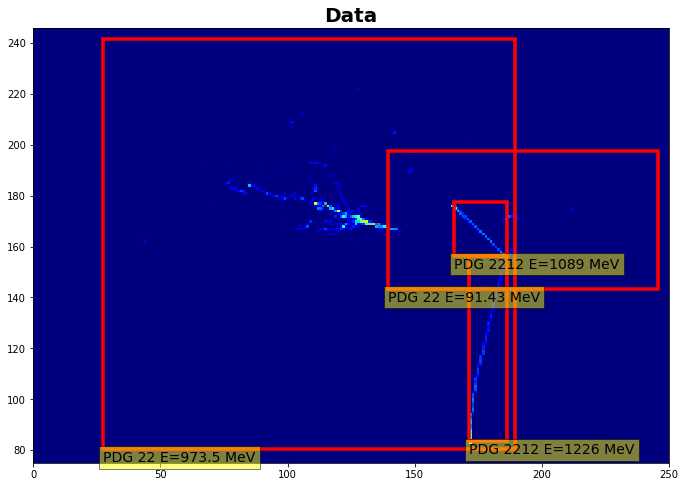

In [11]:
import matplotlib.patches as patches
ENTRY=2

#
# Draw an image first
#
# Create TChain for data image
chain_image2d = ROOT.TChain('image2d_data_tree')
chain_image2d.AddFile('C2/test_10k.root')
chain_image2d.GetEntry(ENTRY)

# Let's grab a specific projection (1st one)
cpp_image2d = chain_image2d.image2d_data_branch.as_vector().front()
image2d = larcv.as_ndarray(cpp_image2d)
    
# Draw image
fig, ax = plt.subplots(figsize=(12,8), facecolor='w')
ax.imshow(image2d, interpolation='none', cmap='jet', origin='lower')
ax.set_title('Data',fontsize=20,fontname='Georgia',fontweight='bold')

#
# Draw bounding boxes
#
particle_mcst_chain = TChain("particle_mcst_tree")
particle_mcst_chain.AddFile("C2/test_10k.root")
particle_mcst_chain.GetEntry(ENTRY)
cpp_object = particle_mcst_chain.particle_mcst_branch

for particle in cpp_object.as_vector():
    # obtain bounding-box: it's in [cm] scale 
    box = particle.boundingbox_2d().front()
    x_pixel_pos = box.min_x()  / cpp_image2d.meta().pixel_width()
    y_pixel_pos = box.min_y()  / cpp_image2d.meta().pixel_height()
    box_width   = box.width()  / cpp_image2d.meta().pixel_width()
    box_height  = box.height() / cpp_image2d.meta().pixel_height()

    ax.add_patch(plt.Rectangle( (x_pixel_pos, y_pixel_pos), box_width, box_height,
                                fill=False,
                                edgecolor='red', linewidth=3.5 )
                )
    
    ax.text(x_pixel_pos, y_pixel_pos - 5, 
            'PDG {:d} E={:.4g} MeV'.format(particle.pdg_code(),particle.energy_init()),
            bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14, color='black'
           )
    
# Get image range to focus
xlim, ylim = get_view_range(image2d)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

In [13]:
# Create TChain
particle_mcst_chain = TChain("particle_mcst_tree")
particle_mcst_chain.AddFile("C2/test_10k.root")
num_entries = particle_mcst_chain.GetEntries()

# These are handy constants
PDG_LIST = np.array([11,22,13,211,-211,2212])
PDG_NAME = ['electron','gamma','muon','piplus','piminus','proton']

# These are analysis variable containers
total_deposit_energy  = np.zeros([num_entries],dtype=np.float32)
total_kinetic_energy  = np.zeros([num_entries],dtype=np.float32)
total_multiplicity    = np.zeros([num_entries],dtype=np.int32)
particle_multiplicity = [np.zeros([num_entries],dtype=np.int32) for _ in PDG_LIST]

# Event loop to fill the analysis variable containers
for entry in np.arange(num_entries):
    particle_mcst_chain.GetEntry(entry)
    cpp_object = particle_mcst_chain.particle_mcst_branch
    
    deposit_energy = 0.
    initial_energy = 0.
    multiplicity = 0
    for particle in cpp_object.as_vector():
        deposit_energy += particle.energy_deposit()
        if not particle.track_id() == particle.parent_track_id(): continue
        particle_multiplicity[np.where(particle.pdg_code() == PDG_LIST)[0][0]][entry] += 1
        multiplicity += 1
        initial_energy += (particle.energy_init() - larcv.ParticleMass(particle.pdg_code()))
        
    total_multiplicity[entry]   = multiplicity
    total_deposit_energy[entry] = deposit_energy
    total_kinetic_energy[entry] = initial_energy

import pandas as pd
df = pd.DataFrame(data={'initial_energy' : total_kinetic_energy,
                        'deposit_energy' : total_deposit_energy,
                        'multi_total'    : total_multiplicity,
                        'multi_electron' : particle_multiplicity[0],
                        'multi_gamma'    : particle_multiplicity[1],
                        'multi_muon'     : particle_multiplicity[2],
                        'multi_piplus'   : particle_multiplicity[3],
                        'multi_piminus'  : particle_multiplicity[4],
                        'multi_proton'   : particle_multiplicity[5]})

In [14]:
# Let's checkout multiplicity unique values & counts
unique_values, unique_counts = np.unique(df.multi_total, return_counts=True)
print()
print('Multiplicity values:',unique_values)
print('Multiplicity counts:',unique_counts)


Multiplicity values: [1 2 3 4 5]
Multiplicity counts: [  17 2545 2422 2552 2464]


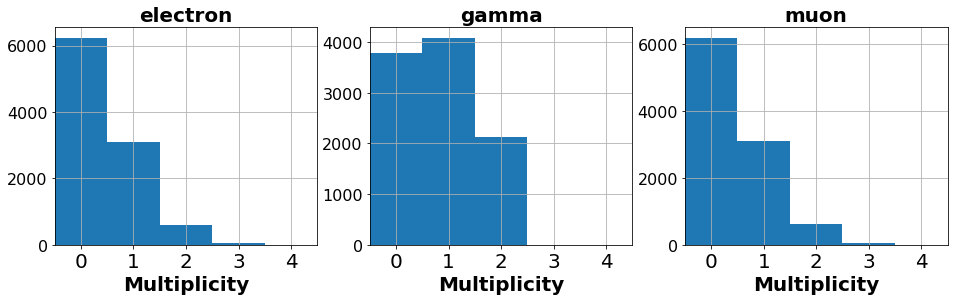

Event counts with at least 1 electron or muon: 6371
Event counts with at least 1 gamma ray: 6208


In [15]:
from matplotlib.ticker import FormatStrFormatter
# Compare electron vs. muon vs. gamma ray multiplicity distributions
fig, axes = plt.subplots(1,3,figsize=(16,4),facecolor='w')

for index, name in enumerate(['electron','gamma','muon']):
    ax = axes[index]
    exec('ax.hist(df.multi_{}, bins=5, range=(-0.5,4.5))'.format(name))
    ax.set_xlim(-0.5,4.5)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_ticks(np.arange(0, 5, 1.))
    ax.set_title(name,fontsize=20,fontweight='bold',fontname='Georgia')
    ax.set_xlabel('Multiplicity',fontsize=20,fontweight='bold',fontname='Georgia')
    ax.tick_params('x',labelsize=20)
    ax.tick_params('y',labelsize=16)
    ax.grid()
plt.show()

print('Event counts with at least 1 electron or muon:',df.query('multi_electron >0 or multi_muon >0').index.size)
print('Event counts with at least 1 gamma ray:',df.query('multi_gamma>0').index.size)

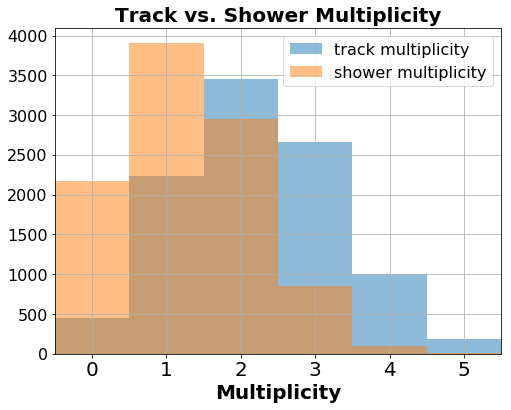

In [16]:
fig, ax = plt.subplots(figsize=(8,6),facecolor='w')

track_counts  = df.multi_muon.values + df.multi_piplus.values + df.multi_piminus.values + df.multi_proton.values
shower_counts = df.multi_electron.values + df.multi_gamma.values

ax.hist(track_counts,  bins=6, range=(-0.5,5.5), alpha=0.5, label='track multiplicity')
ax.hist(shower_counts, bins=6, range=(-0.5,5.5), alpha=0.5, label='shower multiplicity')

ax.set_xlim(-0.5,5.5)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_ticks(np.arange(0, 6, 1.))
ax.set_title("Track vs. Shower Multiplicity",fontsize=20,fontweight='bold',fontname='Georgia')
ax.set_xlabel('Multiplicity',fontsize=20,fontweight='bold',fontname='Georgia')
ax.tick_params('x',labelsize=20)
ax.tick_params('y',labelsize=16)
ax.grid()

leg=plt.legend(fontsize=16,loc=1)
leg_frame=leg.get_frame()
leg_frame.set_facecolor('white')

plt.show()

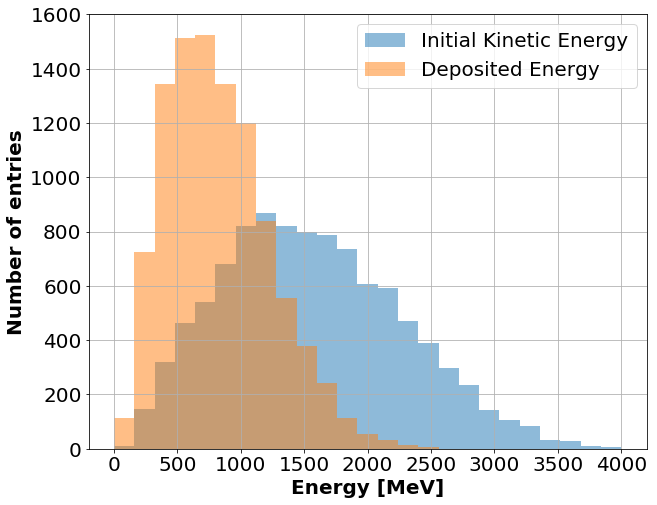

In [17]:
fig,ax = plt.subplots(figsize=(10,8),facecolor='w')
plt.hist(df.initial_energy.values,bins=25,range=(0.,4000),alpha=0.5,label="Initial Kinetic Energy")
plt.hist(df.deposit_energy.values,bins=25,range=(0.,4000),alpha=0.5,label="Deposited Energy")
plt.tick_params(labelsize=20)
plt.grid(True,which='both')
plt.xlabel('Energy [MeV]',fontsize=20,fontweight='bold',fontname='Georgia')
plt.ylabel('Number of entries',fontsize=20,fontweight='bold',fontname='Georgia')
leg=plt.legend(fontsize=20,loc=1)
leg_frame=leg.get_frame()
leg_frame.set_facecolor('white')
plt.show()

/home/dell/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


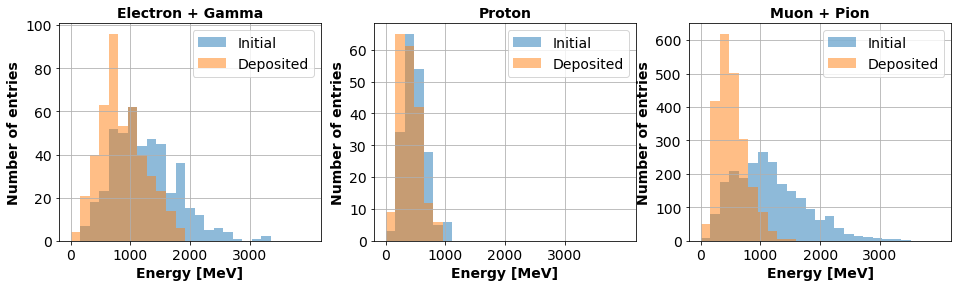

In [18]:
fig, axes = plt.subplots(1,3,figsize=(16,4),facecolor='w')

queries = ['multi_total == (multi_electron + multi_gamma)',
           'multi_total == (multi_proton)',
           'multi_total == (multi_muon + multi_piplus + multi_piminus + multi_proton)']
titles  = ['Electron + Gamma','Proton','Muon + Pion']

for index, query in enumerate(queries):

    sub_df=df.query(query)
    ax = axes[index]
    ax.hist(sub_df.initial_energy.values,bins=25,range=(0.,4000),alpha=0.5,label='Initial')
    ax.hist(sub_df.deposit_energy.values,bins=25,range=(0.,4000),alpha=0.5,label='Deposited')
    ax.set_title(titles[index],fontsize=14,fontweight='bold',fontname='Georgia')

    ax.tick_params(labelsize=14)
    ax.grid(True,which='both')
    ax.set_xlabel('Energy [MeV]',fontsize=14,fontweight='bold',fontname='Georgia')
    ax.set_ylabel('Number of entries',fontsize=14,fontweight='bold',fontname='Georgia')

    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_ticks(np.arange(0, 4000, 1000.))
    
    leg=ax.legend(fontsize=14,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')

    
plt.show()

In [20]:
ENTRY = 2
# Create TChain
chain_particle  = TChain("particle_mcst_tree")
chain_cluster2d = TChain("cluster2d_mcst_tree")

for chain in [chain_particle, chain_cluster2d]:
    chain.AddFile('C2/test_10k.root')
    chain.GetEntry(ENTRY)
    
cpp_particle  = chain_particle.particle_mcst_branch
cpp_cluster2d = chain_cluster2d.cluster2d_mcst_branch

# Print number of particles
print('Number of particles:',cpp_particle.as_vector().size())
# Print number of stored clusters in the first projection
print('Number of clusters:',cpp_cluster2d.cluster_pixel_2d(0).as_vector().size())


Number of particles: 4
Number of clusters: 5


In [21]:
for index, particle in enumerate(cpp_particle.as_vector()):
    cluster = cpp_cluster2d.cluster_pixel_2d(0).as_vector()[index]
    msg = 'Particle {:d} has TrackID {:d} and PDG {:d} with {:d} non-zero pixels!'
    print(msg.format(index,particle.track_id(),particle.pdg_code(),cluster.as_vector().size()))

Particle 0 has TrackID 1 and PDG 2212 with 89 non-zero pixels!
Particle 1 has TrackID 2 and PDG 2212 with 43 non-zero pixels!
Particle 2 has TrackID 3 and PDG 22 with 163 non-zero pixels!
Particle 3 has TrackID 4 and PDG 22 with 920 non-zero pixels!


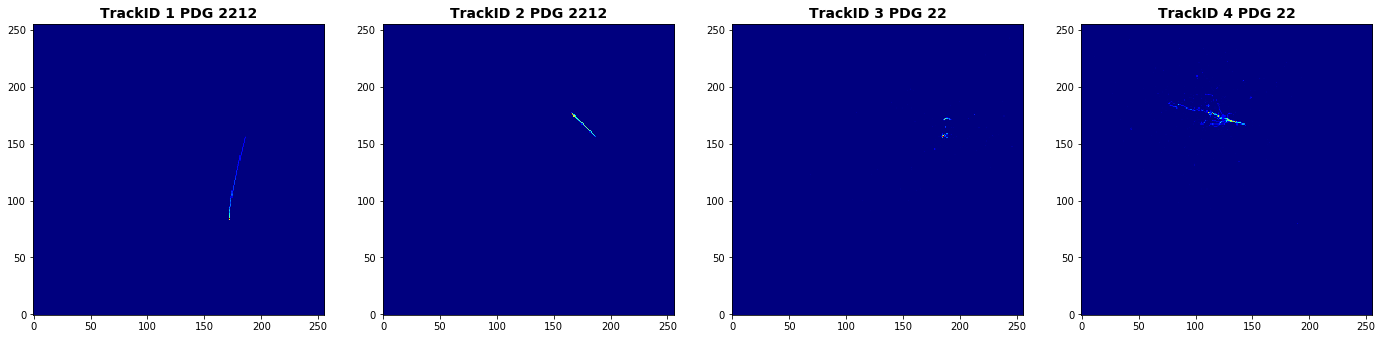

In [22]:
num_particles = cpp_particle.as_vector().size()

fig, axes = plt.subplots(1,num_particles,figsize=(24,8), facecolor='w')
for index, particle in enumerate(cpp_particle.as_vector()):
    ax = axes[index]
    title = 'TrackID {:d} PDG {:d}'.format(particle.track_id(),particle.pdg_code())
    # Draw image from cluster2d_mcst_tree (from projection 0)
    cluster2d = cpp_cluster2d.cluster_pixel_2d(0).as_vector()[index]
    image2d = larcv.as_image2d(cluster2d, cpp_cluster2d.cluster_pixel_2d(0).meta())
    image2d = larcv.as_ndarray(image2d) * 100.
    ax.imshow(image2d, interpolation='none', cmap='jet', origin='lower')
    ax.set_title(title,fontsize=14,fontname='Georgia',fontweight='bold')

plt.show()

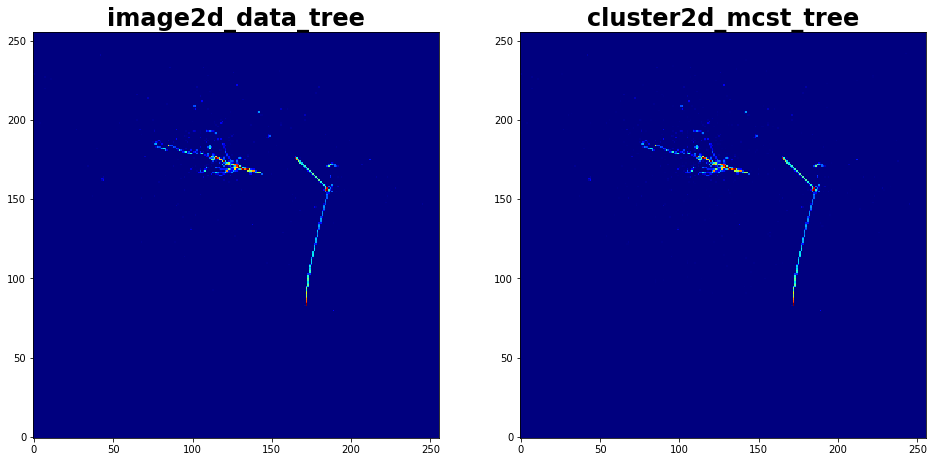

In [23]:
# Draw image2d
chain_image2d = TChain("image2d_data_tree")
chain_image2d.AddFile('C2/test_10k.root')
chain_image2d.GetEntry(ENTRY)
cpp_image2d = chain_image2d.image2d_data_branch.as_vector().front()

fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,8), facecolor='w')

image2d = larcv.as_ndarray(cpp_image2d)
ax0.imshow(image2d, interpolation='none', cmap='jet', vmin=0, vmax=1000, origin='lower')
ax0.set_title('image2d_data_tree',fontsize=24,fontname='Georgia',fontweight='bold')

# Draw from cluster2d
cluster2d = np.zeros(image2d.shape,dtype=np.float32)

num_particles = cpp_particle.as_vector().size()
for index, particle in enumerate(cpp_particle.as_vector()):
    title = 'TrackID {:d} PDG {:d}'.format(particle.track_id(),particle.pdg_code())
    # Draw image from cluster2d_mcst_tree (from projection 0)
    particle_cluster = cpp_cluster2d.cluster_pixel_2d(0).as_vector()[index]
    image2d_from_cluster2d = larcv.as_image2d(particle_cluster, cpp_cluster2d.cluster_pixel_2d(0).meta())
    image2d_from_cluster2d = larcv.as_ndarray(image2d_from_cluster2d) * 100.
    cluster2d = cluster2d + image2d_from_cluster2d
    
ax1.imshow(cluster2d, interpolation='none', cmap='jet', vmin=0, vmax=1000, origin='lower')
ax1.set_title('cluster2d_mcst_tree',fontsize=24,fontname='Georgia',fontweight='bold')

plt.show()

In [24]:
msg = 'Image from {:s} ... mean {:.4g} pixel count {:d}'
print(msg.format('image2d_data_tree',image2d.mean(),(image2d>0).astype(np.int32).sum()))
print(msg.format('cluster2d_data_tree',cluster2d.mean(),(cluster2d>0).astype(np.int32).sum()))

Image from image2d_data_tree ... mean 1.936 pixel count 650
Image from cluster2d_data_tree ... mean 1.979 pixel count 1204


In [25]:
msg = 'Image from {:s} ... mean {:.4g} pixel count {:d}'
nonzero_image2d   = image2d[np.where(image2d>=10.)]
nonzero_cluster2d = cluster2d[np.where(cluster2d>=10.)]
print(msg.format('image2d_data_tree',nonzero_image2d.mean(),len(nonzero_image2d)))
print(msg.format('cluster2d_data_tree',nonzero_cluster2d.mean(),len(nonzero_cluster2d)))

Image from image2d_data_tree ... mean 195.2 pixel count 650
Image from cluster2d_data_tree ... mean 194.2 pixel count 657


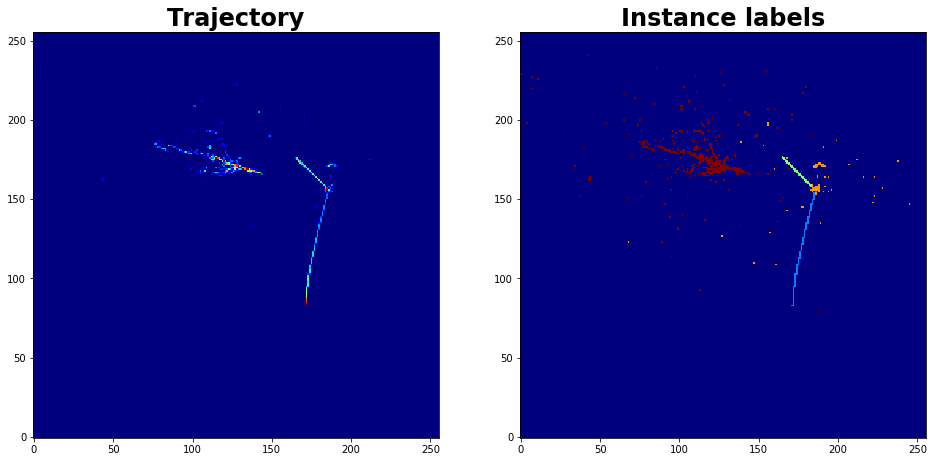

In [26]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,8), facecolor='w')

ax0.imshow(cluster2d, interpolation='none', cmap='jet', vmin=0, vmax=1000, origin='lower')
ax0.set_title('Trajectory',fontsize=24,fontname='Georgia',fontweight='bold')

# Create instance-wise label
label_cluster2d = np.zeros(cluster2d.shape,dtype=np.float32)

num_particles = cpp_particle.as_vector().size()
for index, particle in enumerate(cpp_particle.as_vector()):
    title = 'TrackID {:d} PDG {:d}'.format(particle.track_id(),particle.pdg_code())
    # Draw image from cluster2d_mcst_tree (from projection 0)
    particle_cluster = cpp_cluster2d.cluster_pixel_2d(0).as_vector()[index]
    image2d_from_cluster2d = larcv.as_image2d(particle_cluster, cpp_cluster2d.cluster_pixel_2d(0).meta())
    image2d_from_cluster2d = larcv.as_ndarray(image2d_from_cluster2d) * 100.
    label_cluster2d[np.where(image2d_from_cluster2d >= 10.)] = index+1
    
ax1.imshow(label_cluster2d, interpolation='none', cmap='jet', vmin=0, vmax=num_particles, origin='lower')
ax1.set_title('Instance labels',fontsize=24,fontname='Georgia',fontweight='bold')
plt.show()